<img src="https://raw.githubusercontent.com/Paulodiastst/Curso_EBAC-Profissao_Cientista_de_Dados/main/Cientista%20de%20Dados/ebac-course-utils/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Profissão: Cientista de Dados**
### **Módulo 10** | Descritiva II - Análise descritiva para resposta contínua | Exercício 2

Aluno [Paulo Roberto](https://www.linkedin.com/in/paulo-roberto/)<br>
Data: 27 de setembro de 2024.

---

# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
file = 'C:/Users/Paulo Roberto/Downloads/Exercício 2 módulo 10/Profissao- Cientista de Dados_M10_support material.csv'
df = pd.read_csv(file)

df = df.drop(columns='Unnamed: 0').set_index(keys='index', drop=True)
df.drop_duplicates(inplace=True)
df

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
index,,,,,,,,,,,,,,
8682,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
12830,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2885,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
16168,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
12438,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16065,2016-03-01,M,True,True,0,Assalariado,Secundário,Casado,Casa,30,9.800000,2.0,False,3018.59
3678,2016-03-01,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
3405,2016-03-01,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18


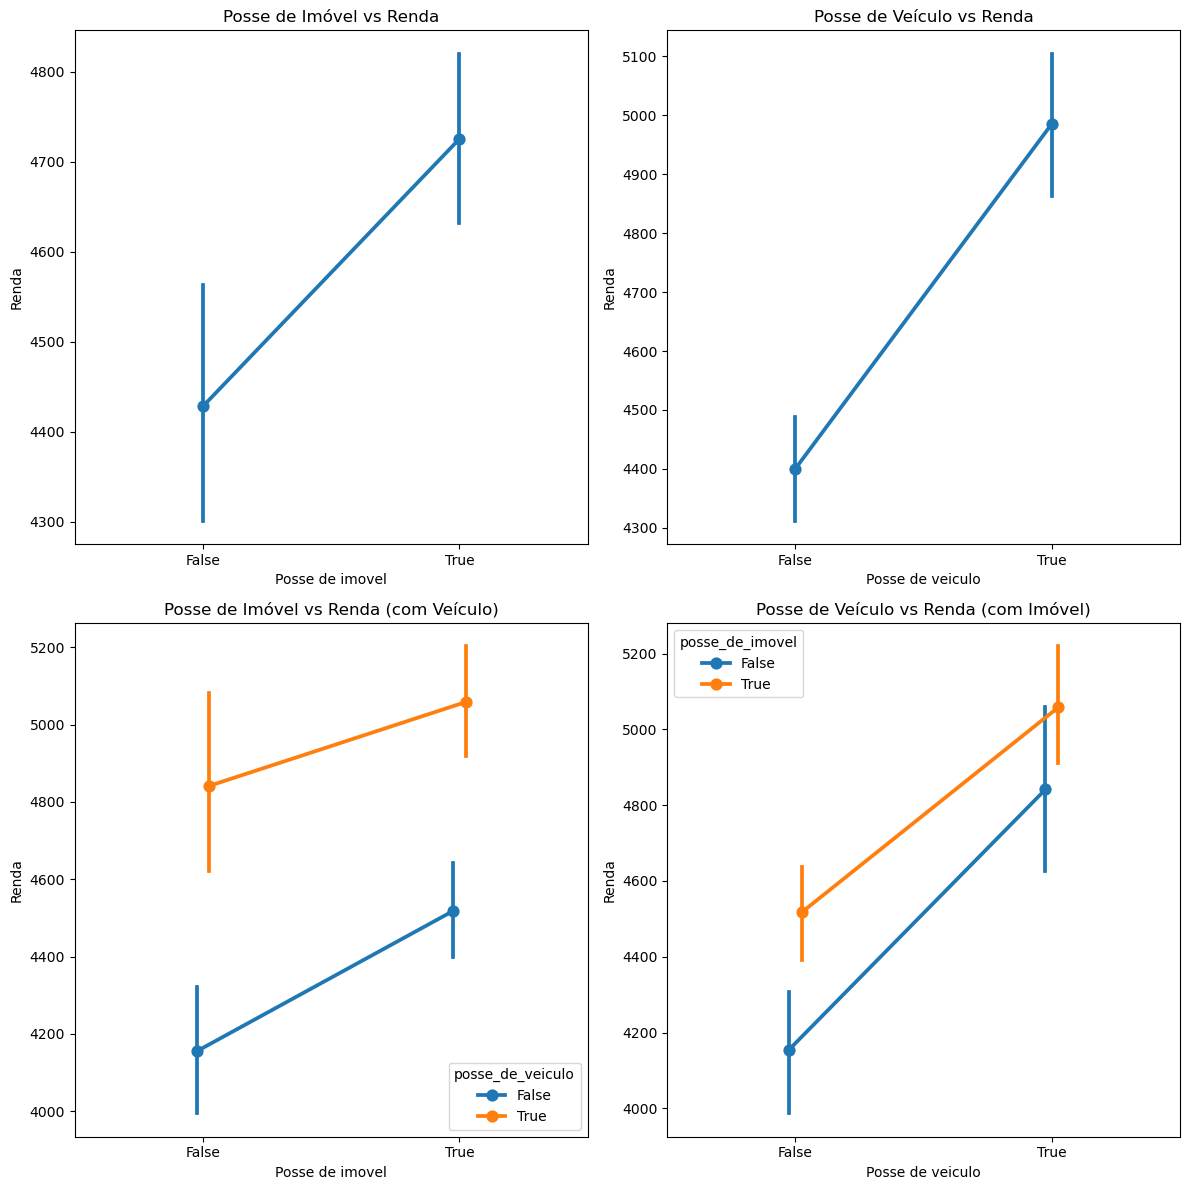

In [3]:
plt.rc('figure', figsize=(12, 12))

# Função para criar gráficos pointplot
def criar_pointplot(x, y, hue, data, ax, titulo):
    sns.pointplot(x=x, y=y, hue=hue, data=data, dodge=True, ax=ax)
    ax.set_title(titulo)
    ax.set_ylabel('Renda')
    ax.set_xlabel(x.replace('_', ' ').capitalize())

# Criação dos subplots (2x2)
fig, axes = plt.subplots(2, 2)

# Gráfico 1: Posse de imóvel x Renda
criar_pointplot(x='posse_de_imovel', y='renda', hue=None, data=df, ax=axes[0, 0], titulo='Posse de Imóvel vs Renda')

# Gráfico 2: Posse de veículo x Renda
criar_pointplot(x='posse_de_veiculo', y='renda', hue=None, data=df, ax=axes[0, 1], titulo='Posse de Veículo vs Renda')

# Gráfico 3: Posse de imóvel x Renda (com posse de veículo como hue)
criar_pointplot(x='posse_de_imovel', y='renda', hue='posse_de_veiculo', data=df, ax=axes[1, 0], titulo='Posse de Imóvel vs Renda (com Veículo)')

# Gráfico 4: Posse de veículo x Renda (com posse de imóvel como hue)
criar_pointplot(x='posse_de_veiculo', y='renda', hue='posse_de_imovel', data=df, ax=axes[1, 1], titulo='Posse de Veículo vs Renda (com Imóvel)')

# Ajuste o layout para evitar sobreposição
plt.tight_layout()

plt.show()

A análise revela que a posse de imóvel e veículo está positivamente associada à renda. Indivíduos com imóvel tendem a ter maior renda do que aqueles sem, assim como a posse de veículo também indica maior poder aquisitivo. A combinação de ambos (imóvel e veículo) reforça essa correlação, mostrando rendas ainda mais elevadas. Em geral, a posse de imóvel parece ter um impacto mais forte na renda do que a de veículo, sugerindo uma hierarquia de importância entre esses bens.